# USE CLUSTERING TO IDENTIFY THE CATEGORIES OF THE CARS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [2]:
data = pd.read_excel("CARS.xlsx")
data.head()

,Weight,Horsepower
0,2.620,110
1,2.875,110
2,2.320,93
3,3.215,110
4,3.440,175


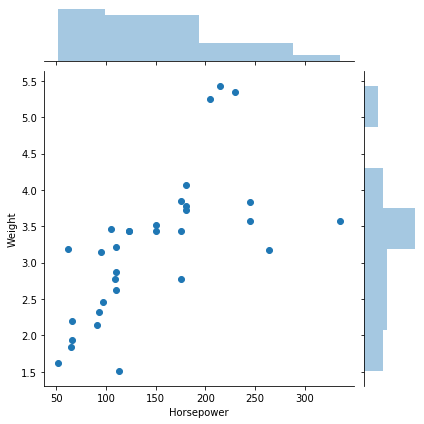

In [3]:
sns.jointplot(x = data['Horsepower'], y = data['Weight'],kind = 'scatter')

In [4]:
data.describe()

,Weight,Horsepower
count,32.000000,32.000000
mean,3.216937,146.687500
std,0.978254,68.562868
min,1.513000,52.000000
25%,2.581250,96.500000
50%,3.325000,123.000000
75%,3.610000,180.000000
max,5.424000,335.000000


## USING K-MEANS FOR THE PURPOSE OF CLUSTERING

### 1] ELBOW METHOD

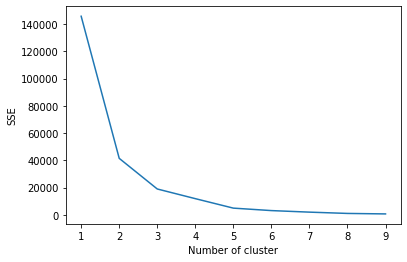

In [5]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

### k = 3

### 2] SILHOUETTE METHOD

In [6]:
from sklearn.metrics import silhouette_score

In [7]:
sil = []
kmax = 10

for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(data)
  labels = kmeans.labels_
  sil.append(silhouette_score(data, labels, metric = 'euclidean'))

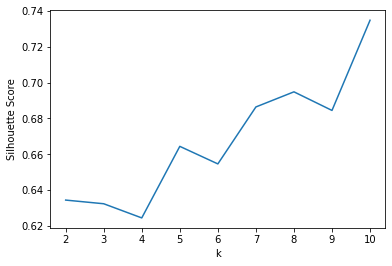

In [8]:
plt.figure()
plt.plot(range(2,kmax+1),sil)
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.show()

### k = 10

## MODEL

In [9]:
model = KMeans(n_clusters = 3,max_iter = 1000)
model.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
cluster = model.cluster_centers_
cluster

array([[  2.59958824,  93.52941176],
       [  3.897     , 263.8       ],
       [  3.9264    , 178.5       ]])

In [22]:
model.predict([[3.75,300]])

array([1])

Text(0, 0.5, 'WEIGHT')

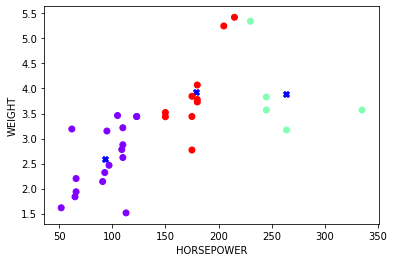

In [23]:
centroids = np.array(cluster)
plt.scatter(centroids[:,1],centroids[:,0], marker="X", color = 'b')
plt.scatter(data['Horsepower'],data['Weight'],c=model.labels_,
            cmap ='rainbow')
plt.xlabel('HORSEPOWER')
plt.ylabel('WEIGHT')

# END